# Linear Regression 

- Dataset: bike sharing dataset- 서울시 공용자전거(2017-2018)
    
- 데이터 전처리중
- 여러 형태의 그래프 그려보기
- 탐색적 데이터 분석


In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import missingno as msno

## 1. 탐색
### 데이터셋의 기본 정보 구하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# data
bike = pd.read_csv("datas/SeoulBikeData.csv", encoding='cp949')
bike

Date  Rented Bike Count  Hour  Temperature(캜)  Humidity(%)  \
0     01/12/2017                254     0            -5.2           37   
1     01/12/2017                204     1            -5.5           38   
2     01/12/2017                173     2            -6.0           39   
3     01/12/2017                107     3            -6.2           40   
4     01/12/2017                 78     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1003    19             4.2           34   
8756  30/11/2018                764    20             3.4           37   
8757  30/11/2018                694    21             2.6           39   
8758  30/11/2018                712    22             2.1           41   
8759  30/11/2018                584    23             1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(캜)  \
0                  2.2              2000                     -17.6   
1                  0.8              2000                     -17.6   
2                  1.0              2000                     -17.7   
3                  0.9              2000                     -17.6   
4                  2.3              2000                     -18.6   
...                ...               ...                       ...   
8755               2.6              1894                     -10.3   
8756               2.3              2000                      -9.9   
8757               0.3              1968                      -9.9   
8758               1.0              1859                      -9.8   
8759               1.3              1909                      -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

<AxesSubplot:>

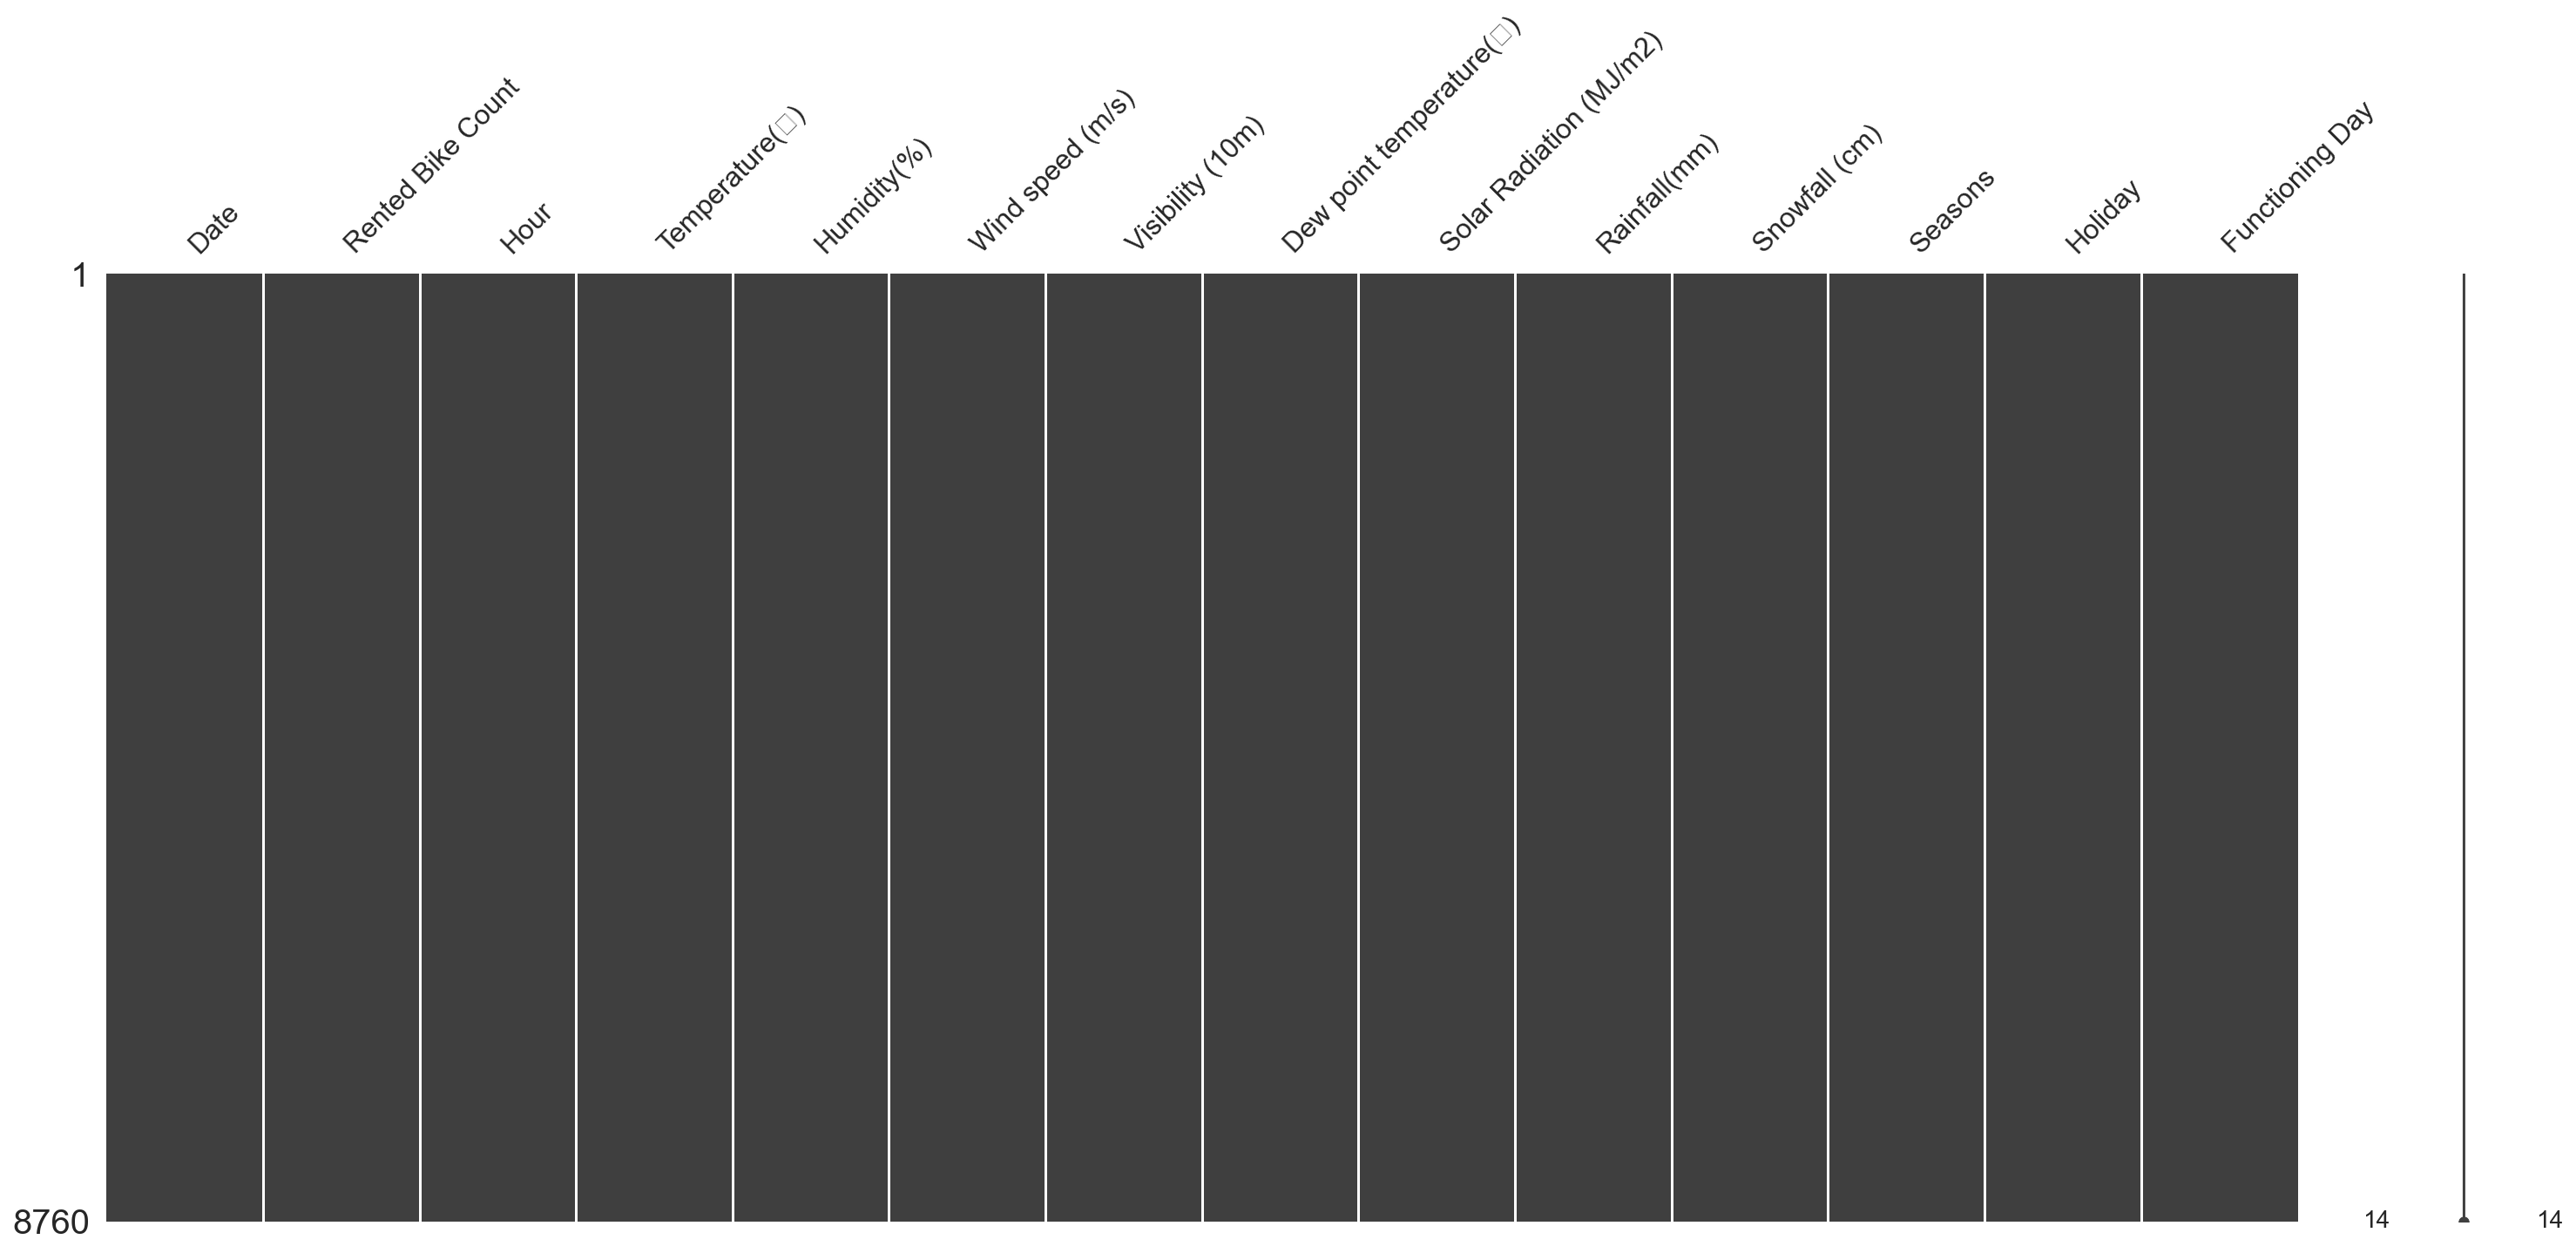

In [3]:
#결측치 확인
msno.matrix(bike)

In [4]:
bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## 2. 데이터 전처리
- Feautre selection

In [5]:
bike.rename(columns={"Temperature(캜)": "Temperature(℃)" }, inplace=True)
bike.drop(['Dew point temperature(캜)', 'Solar Radiation (MJ/m2)', 'Functioning Day'], axis=1, inplace=True)
bike

Date  Rented Bike Count  Hour  Temperature(℃)  Humidity(%)  \
0     01/12/2017                254     0            -5.2           37   
1     01/12/2017                204     1            -5.5           38   
2     01/12/2017                173     2            -6.0           39   
3     01/12/2017                107     3            -6.2           40   
4     01/12/2017                 78     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1003    19             4.2           34   
8756  30/11/2018                764    20             3.4           37   
8757  30/11/2018                694    21             2.6           39   
8758  30/11/2018                712    22             2.1           41   
8759  30/11/2018                584    23             1.9           43   

      Wind speed (m/s)  Visibility (10m)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                  2.2              2000           0.0            0.0  Winter   
1                  0.8              2000           0.0            0.0  Winter   
2                  1.0              2000           0.0            0.0  Winter   
3                  0.9              2000           0.0            0.0  Winter   
4                  2.3              2000           0.0            0.0  Winter   
...                ...               ...           ...            ...     ...   
8755               2.6              1894           0.0            0.0  Autumn   
8756               2.3              2000           0.0            0.0  Autumn   
8757               0.3              1968           0.0            0.0  Autumn   
8758               1.0              1859           0.0            0.0  Autumn   
8759               1.3              1909           0.0            0.0  Autumn   

         Holiday  
0     No Holiday  
1     No Holiday  
2     No Holiday  
3     No Holiday  
4     No Holiday  
...          ...  
8755  No Holiday  
8756  No Holiday  
8757  No Holiday  
8758  No Holiday  
8759  No Holiday  

[8760 rows x 11 columns]

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8760 non-null   object 
 1   Rented Bike Count  8760 non-null   int64  
 2   Hour               8760 non-null   int64  
 3   Temperature(℃)     8760 non-null   float64
 4   Humidity(%)        8760 non-null   int64  
 5   Wind speed (m/s)   8760 non-null   float64
 6   Visibility (10m)   8760 non-null   int64  
 7   Rainfall(mm)       8760 non-null   float64
 8   Snowfall (cm)      8760 non-null   float64
 9   Seasons            8760 non-null   object 
 10  Holiday            8760 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 752.9+ KB


In [7]:
bike.describe()

Rented Bike Count         Hour  Temperature(℃)  Humidity(%)  \
count        8760.000000  8760.000000     8760.000000  8760.000000   
mean          704.602055    11.500000       12.882922    58.226256   
std           644.997468     6.922582       11.944825    20.362413   
min             0.000000     0.000000      -17.800000     0.000000   
25%           191.000000     5.750000        3.500000    42.000000   
50%           504.500000    11.500000       13.700000    57.000000   
75%          1065.250000    17.250000       22.500000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Rainfall(mm)  Snowfall (cm)  
count       8760.000000       8760.000000   8760.000000    8760.000000  
mean           1.724909       1436.825799      0.148687       0.075068  
std            1.036300        608.298712      1.128193       0.436746  
min            0.000000         27.000000      0.000000       0.000000  
25%            0.900000        940.000000      0.000000       0.000000  
50%            1.500000       1698.000000      0.000000       0.000000  
75%            2.300000       2000.000000      0.000000       0.000000  
max            7.400000       2000.000000     35.000000       8.800000

### 연, 월 정보 정리

In [8]:
bike['Date']= pd.to_datetime(bike['Date'], format='%d/%m/%Y')
bike['Date'].dtype      

dtype('<M8[ns]')

In [9]:
bike['year'] = pd.DatetimeIndex(bike['Date']).year
bike['month'] = pd.DatetimeIndex(bike['Date']).month

In [10]:
bike.drop(['Date'], axis=1, inplace=True)

In [11]:
bike.head()

Rented Bike Count  Hour  Temperature(℃)  Humidity(%)  Wind speed (m/s)  \
0                254     0            -5.2           37               2.2   
1                204     1            -5.5           38               0.8   
2                173     2            -6.0           39               1.0   
3                107     3            -6.2           40               0.9   
4                 78     4            -6.0           36               2.3   

   Visibility (10m)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  year  \
0              2000           0.0            0.0  Winter  No Holiday  2017   
1              2000           0.0            0.0  Winter  No Holiday  2017   
2              2000           0.0            0.0  Winter  No Holiday  2017   
3              2000           0.0            0.0  Winter  No Holiday  2017   
4              2000           0.0            0.0  Winter  No Holiday  2017   

   month  
0     12  
1     12  
2     12  
3     12  
4     12

In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature(℃)     8760 non-null   float64
 3   Humidity(%)        8760 non-null   int64  
 4   Wind speed (m/s)   8760 non-null   float64
 5   Visibility (10m)   8760 non-null   int64  
 6   Rainfall(mm)       8760 non-null   float64
 7   Snowfall (cm)      8760 non-null   float64
 8   Seasons            8760 non-null   object 
 9   Holiday            8760 non-null   object 
 10  year               8760 non-null   int64  
 11  month              8760 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 821.4+ KB


### 계절별 자전거 렌트 횟수

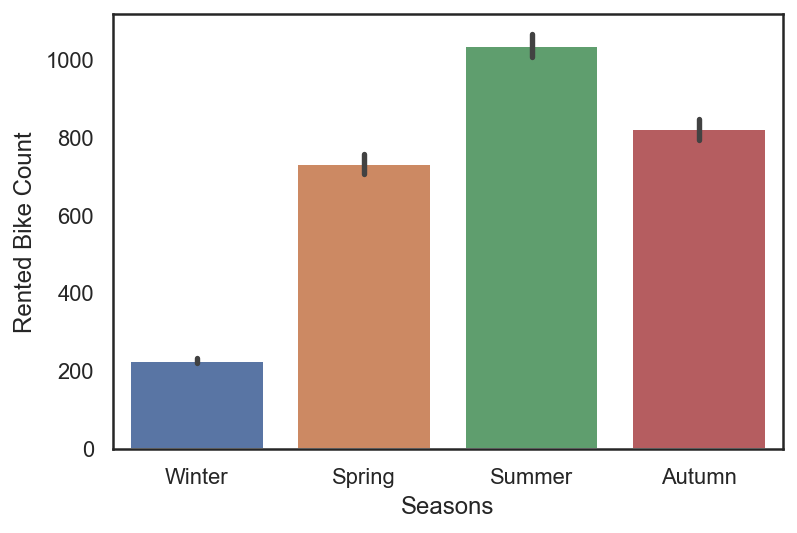

In [13]:
sns.barplot('Seasons', 'Rented Bike Count', data=bike);

### 기온별 자전거 렌트 횟수

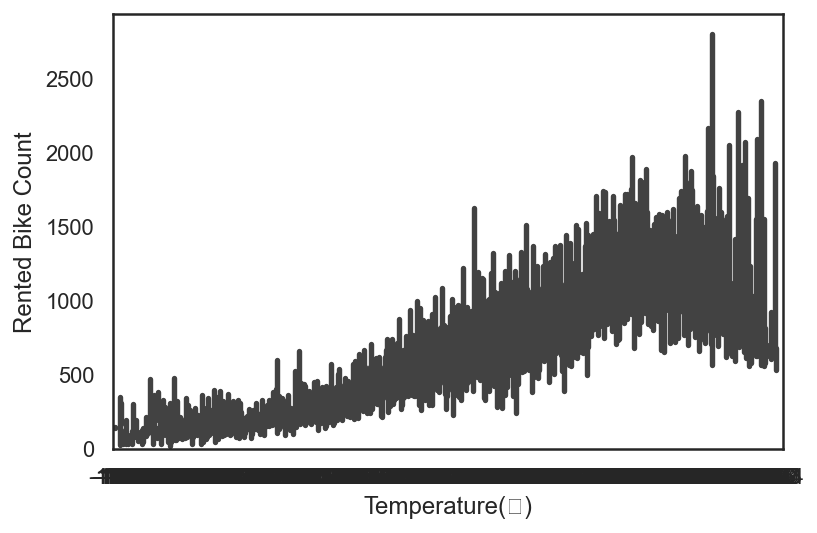

In [14]:
sns.barplot('Temperature(℃)', 'Rented Bike Count', data=bike);

### 휴일 자전거 렌트 횟수

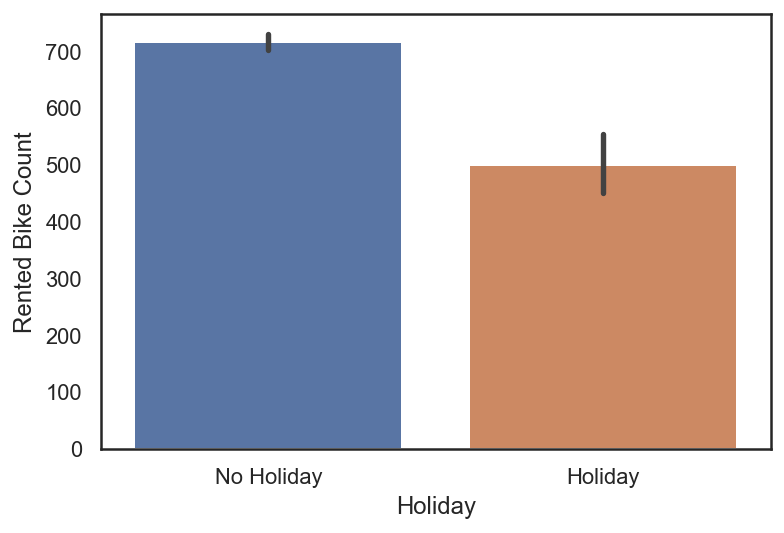

In [15]:
sns.barplot('Holiday', 'Rented Bike Count', data=bike);

### 연도별 자전거 렌트 횟수

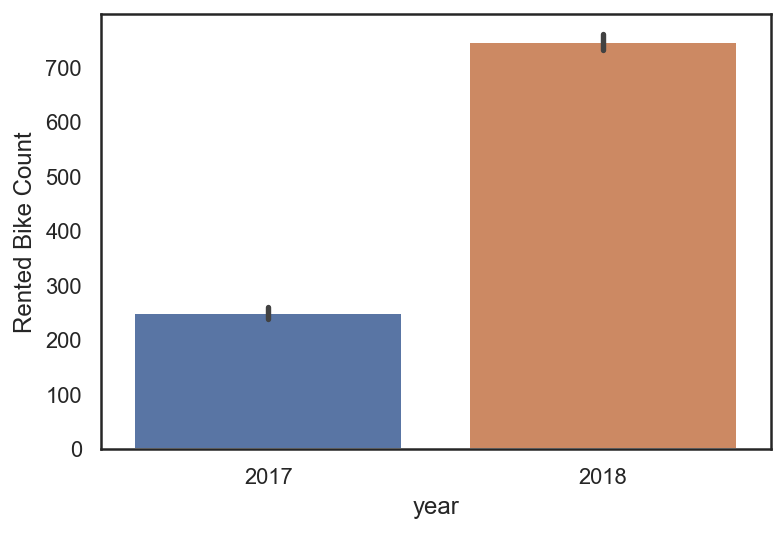

In [16]:
sns.barplot('year', 'Rented Bike Count', data=bike);

### 월별 자전거 렌트 횟수

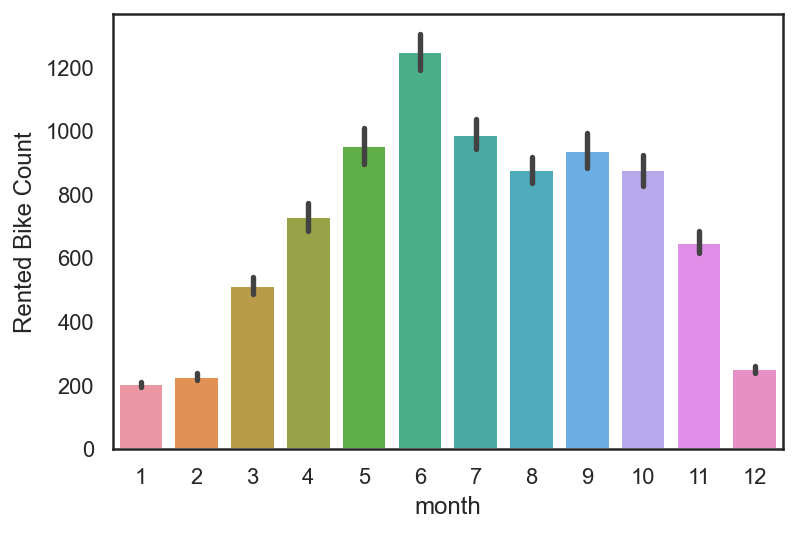

In [17]:
sns.barplot('month', 'Rented Bike Count', data=bike);

### ????? 잉

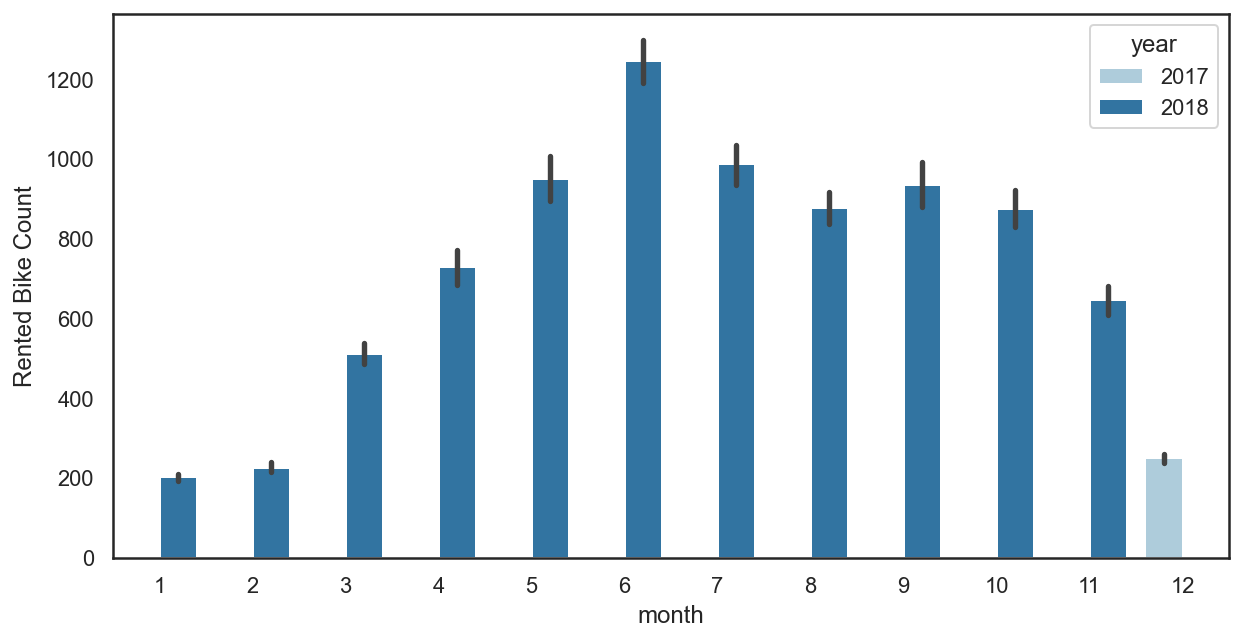

In [18]:
plt.figure(figsize=(10,5))
sns.barplot('month','Rented Bike Count',hue='year',data=bike,palette='Paired');

### 기온별

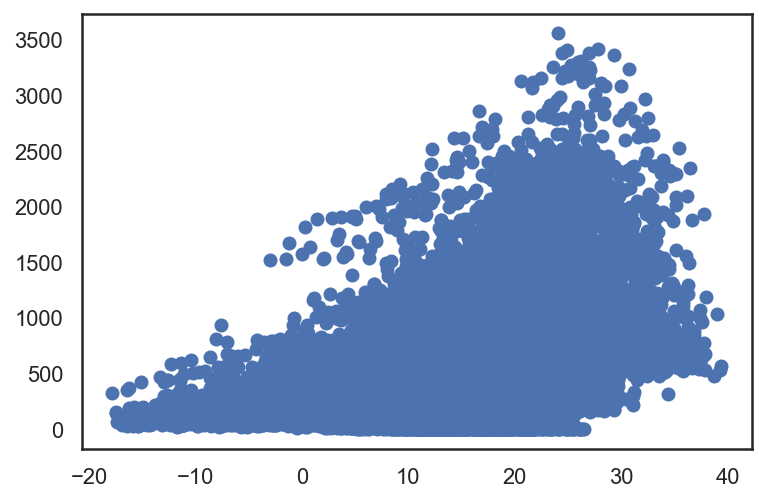

In [19]:
plt.scatter('Temperature(℃)','Rented Bike Count',data=bike);

### 풍속별

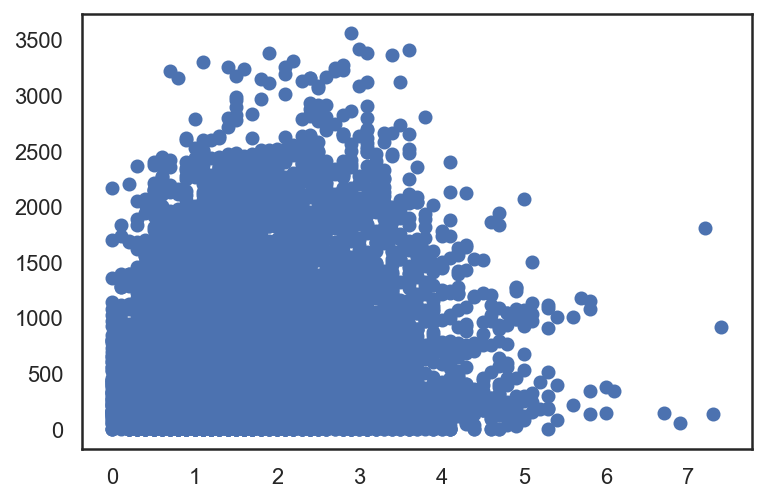

In [20]:
plt.scatter('Wind speed (m/s)','Rented Bike Count',data=bike);

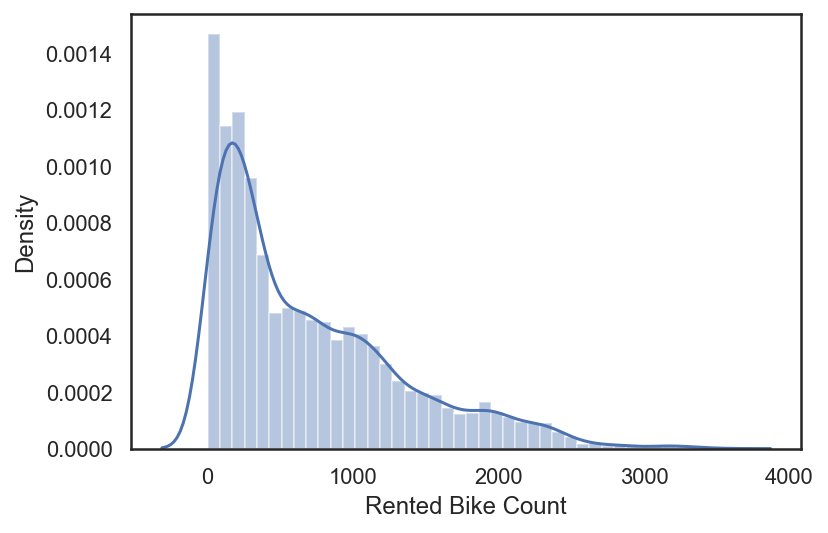

In [21]:
sns.distplot(bike['Rented Bike Count']);

#### ..... ? 네? 

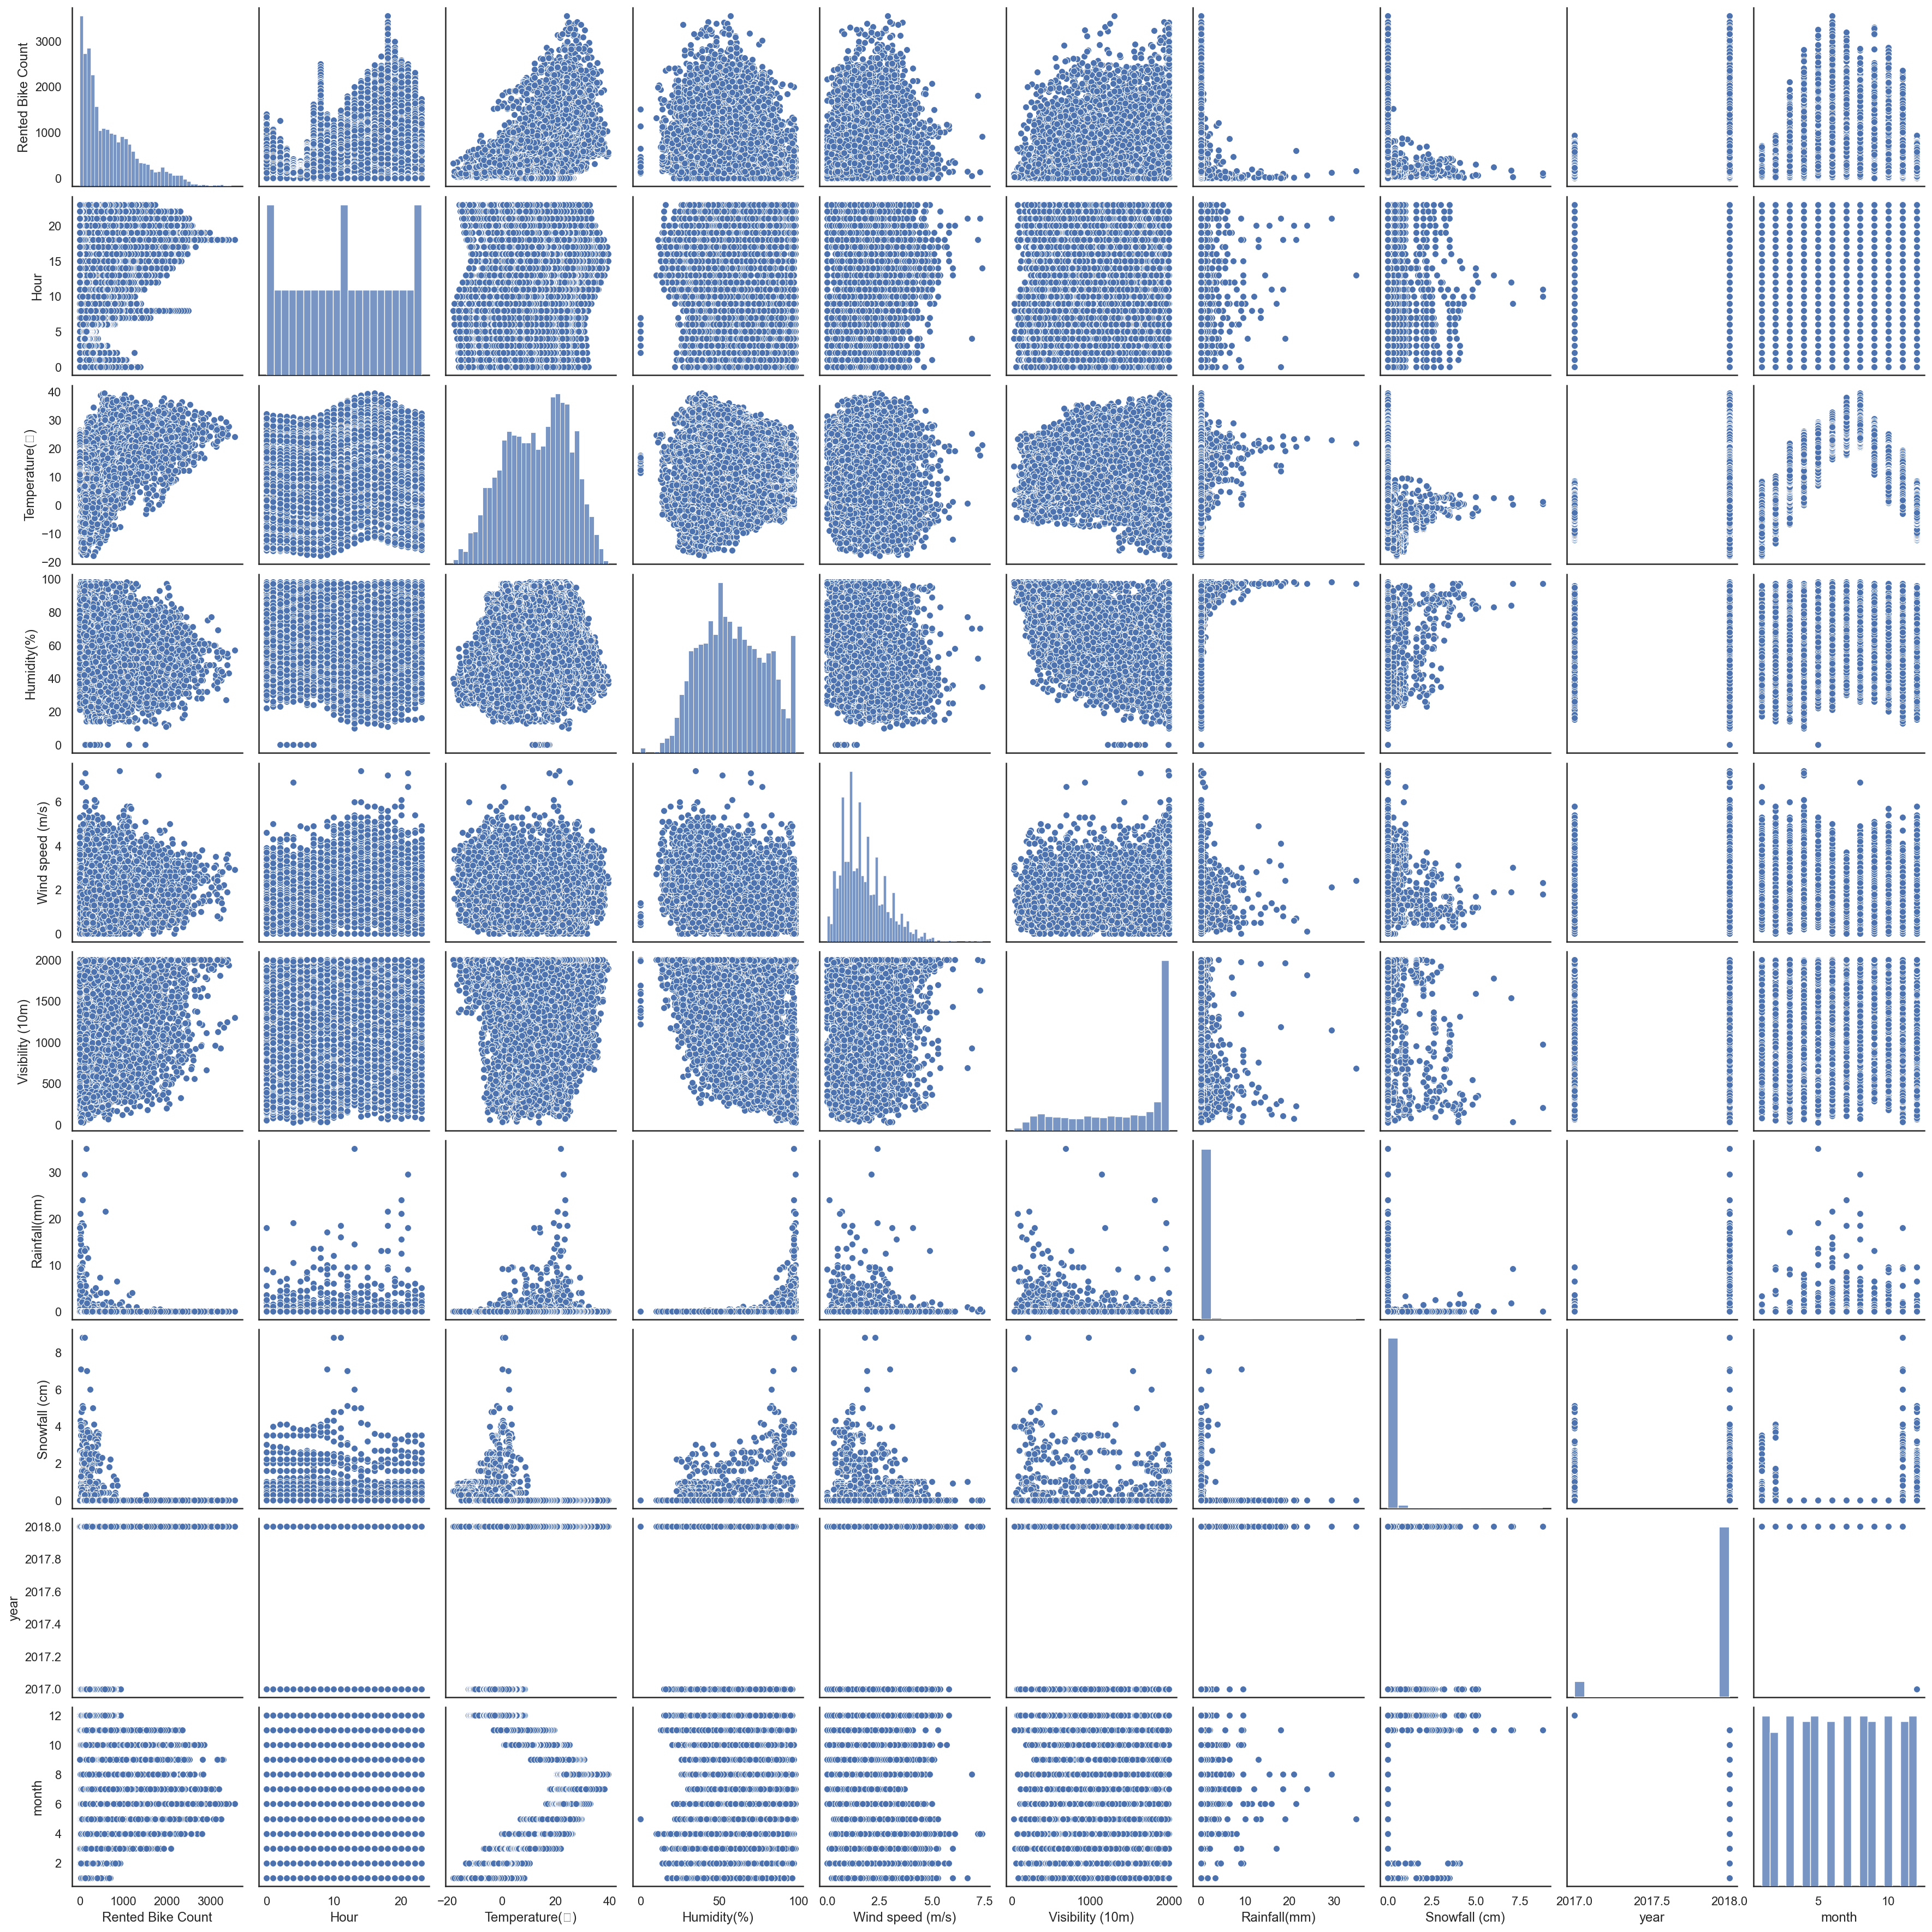

In [22]:
sns.pairplot(bike);

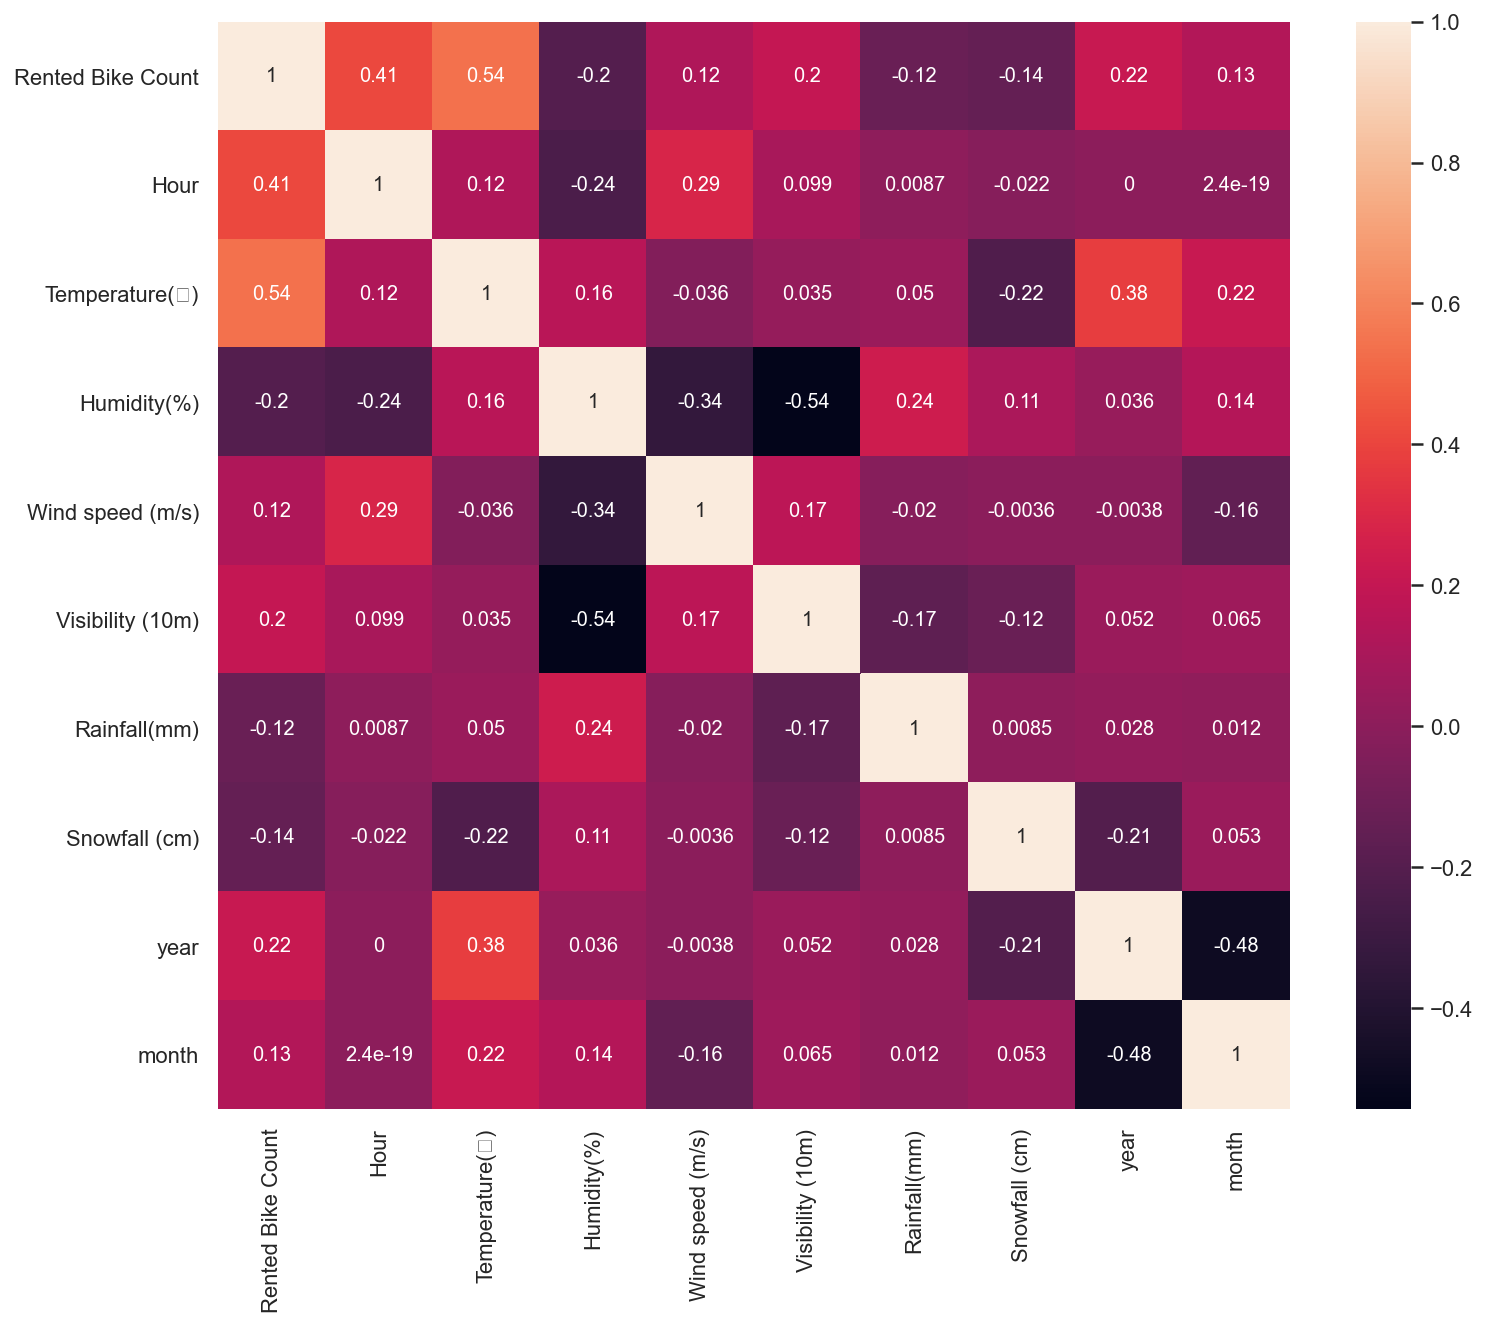

In [23]:
plt.figure(figsize = (12,10))
sns.heatmap(bike.corr(),annot=True);

### 데이터 나누기 
- 라벨 분리, 훈련용/테스트용으로 나누기

In [24]:
from sklearn.model_selection import train_test_split
x = bike.drop('Rented Bike Count', axis=1)
y = bike['Rented Bike Count']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                           random_state=13)
np.unique(y_train, return_counts=True)

(array([   0,    2,    3, ..., 3404, 3418, 3556], dtype=int64),
 array([247,   1,   1, ...,   1,   1,   1], dtype=int64))

In [25]:
code1={'Winter':1, 'Spring':2, 'Summer':3, "Autumn": 4}
bike['Seasons']=bike['Seasons'].map(code1)

code2={'No Holiday':1, 'Holiday':2}
bike['Holiday']=bike['Holiday'].map(code2)

In [26]:
bike['Seasons']

0       1
1       1
2       1
3       1
4       1
       ..
8755    4
8756    4
8757    4
8758    4
8759    4
Name: Seasons, Length: 8760, dtype: int64

In [27]:
#bike = bike.apply(pd.to_numeric, errors='coerce')
bike['Seasons']=bike['Seasons'].astype('float')
bike['Holiday']=bike['Holiday'].astype('float')

In [28]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature(℃)     8760 non-null   float64
 3   Humidity(%)        8760 non-null   int64  
 4   Wind speed (m/s)   8760 non-null   float64
 5   Visibility (10m)   8760 non-null   int64  
 6   Rainfall(mm)       8760 non-null   float64
 7   Snowfall (cm)      8760 non-null   float64
 8   Seasons            8760 non-null   float64
 9   Holiday            8760 non-null   float64
 10  year               8760 non-null   int64  
 11  month              8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


### 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

### 결정나무 훈련

In [29]:
from sklearn.tree import DecisionTreeClassifier

bike_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
bike_tree.fit(x_train, y_train)

ValueError: could not convert string to float: 'Winter'

### 학습결과

In [31]:
from sklearn.metrics import accuracy_score

y_pred_tr = bike_tree.predict(x_train)
y_pred_test = bike_tree.predict(x_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.model_selection import train_test_split
x = bike.drop('Rented Bike Count', axis=1)
y = bike['Rented Bike Count']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                           random_state=13)
np.unique(y_train, return_counts=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=x['Seasons'], name='Seasons'))
fig.add_trace(go.Box(y=x['Temperature(℃)'], name='Temperature'))
fig.add_trace(go.Box(y=x['Holiday'], name='Holiday'))
fig.add_trace(go.Box(y=x['Wind speed (m/s)'], name='Wind speed'))
fig.add_trace(go.Box(y=x['Holiday'], name='Holiday'))

fig.show()

In [ ]:
# 선형회귀 모델 만들기

In [ ]:
import statsmodels.api as sm

lm=sm.OLS(y_train, x_train).fit()
lm=summary()

In [ ]:
# Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS =MinMaxScaler()
ss=StandardScaler()

ss.fit(x)
MMS.fit(x)


x_train